In [1]:
import pandas as pd 
import yfinance as yf 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Kamir\AppData\Local\Temp\ipykernel_19616\4122753300.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [14]:
Data = yf.download("EURUSD=X","2015-01-01","2023-08-30").Close.to_frame()
Data.rename(columns= {"Close" : "Price"}, inplace = True)
Data


[*********************100%%**********************]  1 of 1 completed


,Price
Date,
2015-01-01,1.209863
2015-01-02,1.208941
2015-01-05,1.194643
2015-01-06,1.193902
2015-01-07,1.187536
...,...
2023-08-23,1.084669
2023-08-24,1.086579
2023-08-25,1.079914


In [15]:
SMA_S = 50
SMA_L = 200

In [17]:
Data["SMA_S"]= Data.Price.rolling(SMA_S).mean()
Data["SMA_L"]= Data.Price.rolling(SMA_L).mean()


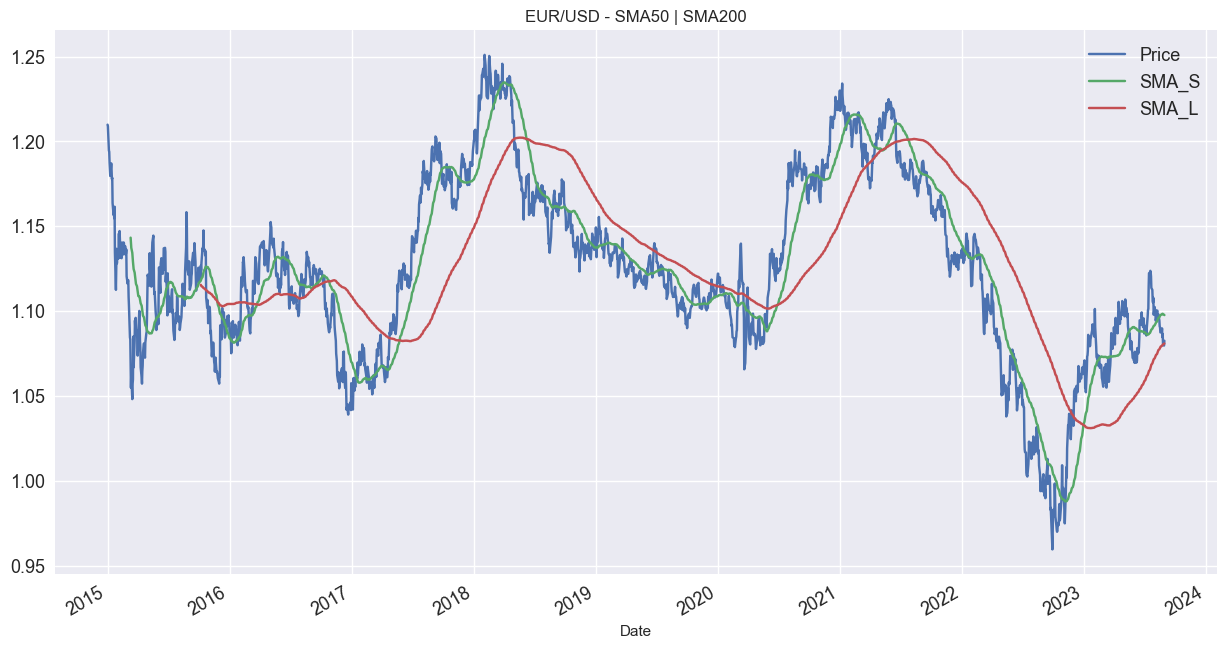

In [21]:
Data.plot(figsize=(15,8), title = "EUR/USD - SMA{} | SMA{}".format(SMA_S, SMA_L), fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [24]:
Data.dropna(inplace = True)

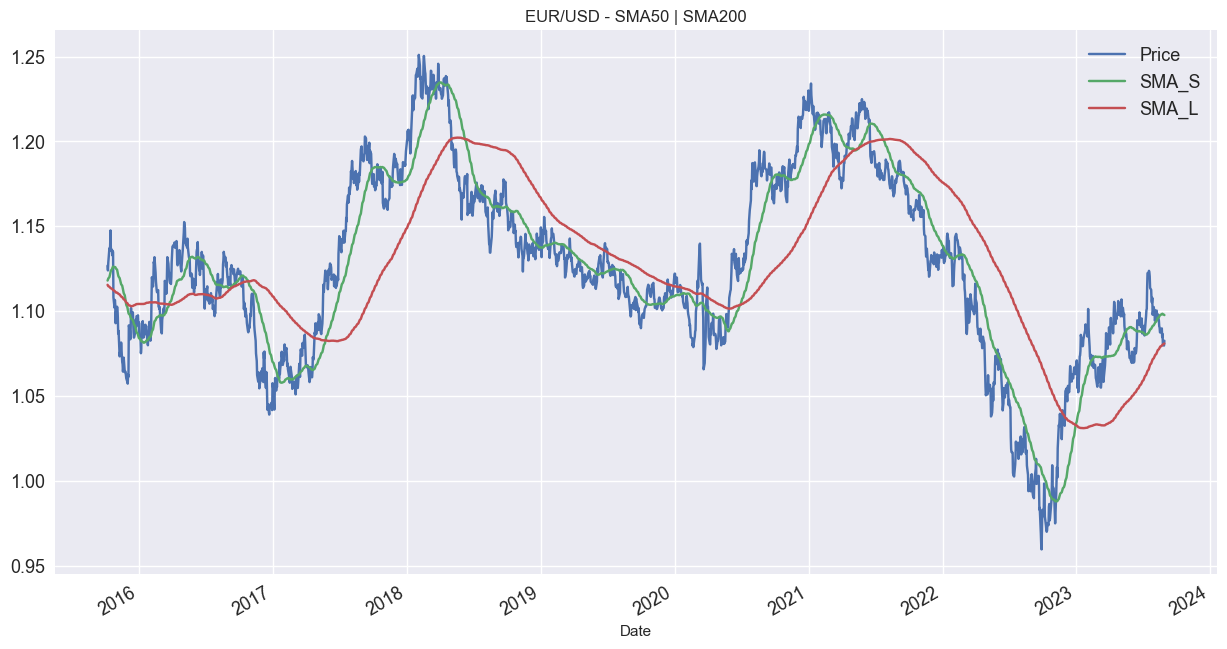

In [26]:
Data.plot(figsize=(15,8), title = "EUR/USD - SMA{} | SMA{}".format(SMA_S, SMA_L), fontsize=13)
plt.legend(fontsize=13)
plt.show()

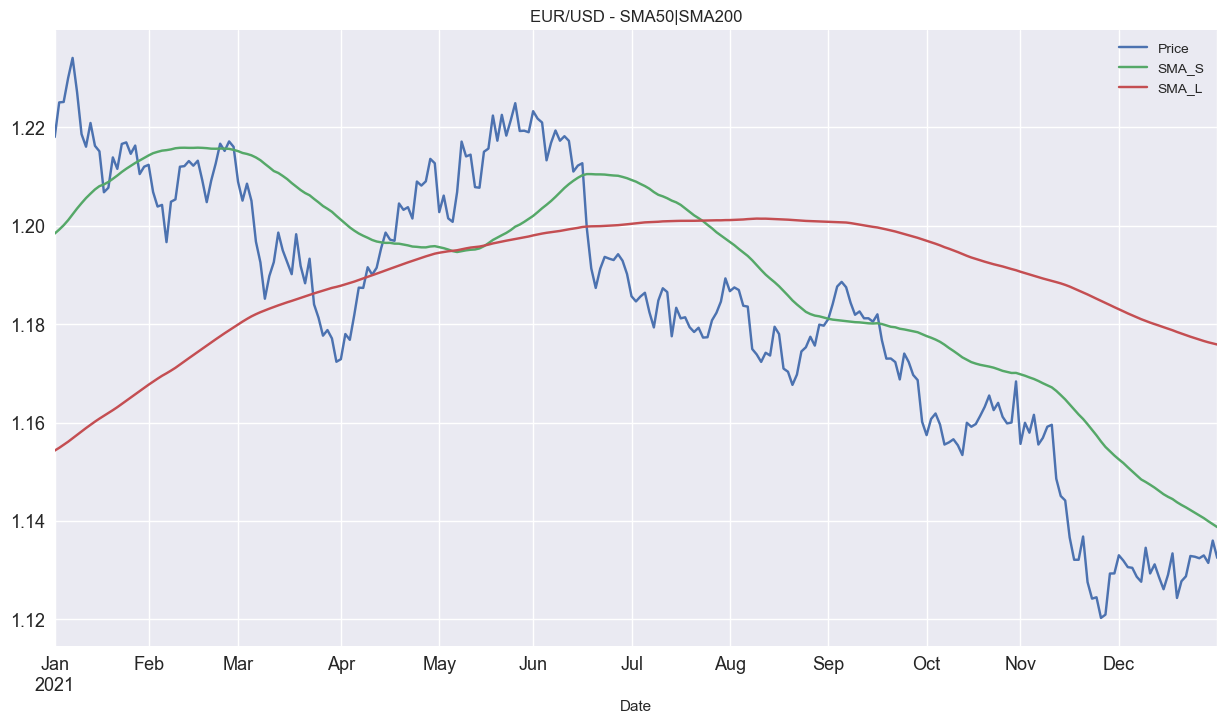

In [30]:
Data.loc["2021"].plot(figsize=(15,8),title="EUR/USD - SMA{}|SMA{}".format(SMA_S,SMA_L), fontsize=(13))
plt.show()

In [32]:
Data["Position"]=np.where(Data["SMA_S"]>Data["SMA_L"],1,-1)

In [33]:
Data

,Price,SMA_S,SMA_L,Position
Date,,,,
2015-10-07,1.126799,1.118026,1.115511,1
2015-10-08,1.124000,1.118538,1.115082,1
2015-10-09,1.128694,1.119233,1.114681,1
2015-10-12,1.136997,1.120035,1.114392,1
2015-10-13,1.135551,1.120834,1.114101,1
...,...,...,...,...
2023-08-23,1.084669,1.098414,1.079975,1
2023-08-24,1.086579,1.098459,1.080211,1
2023-08-25,1.079914,1.098166,1.080429,1


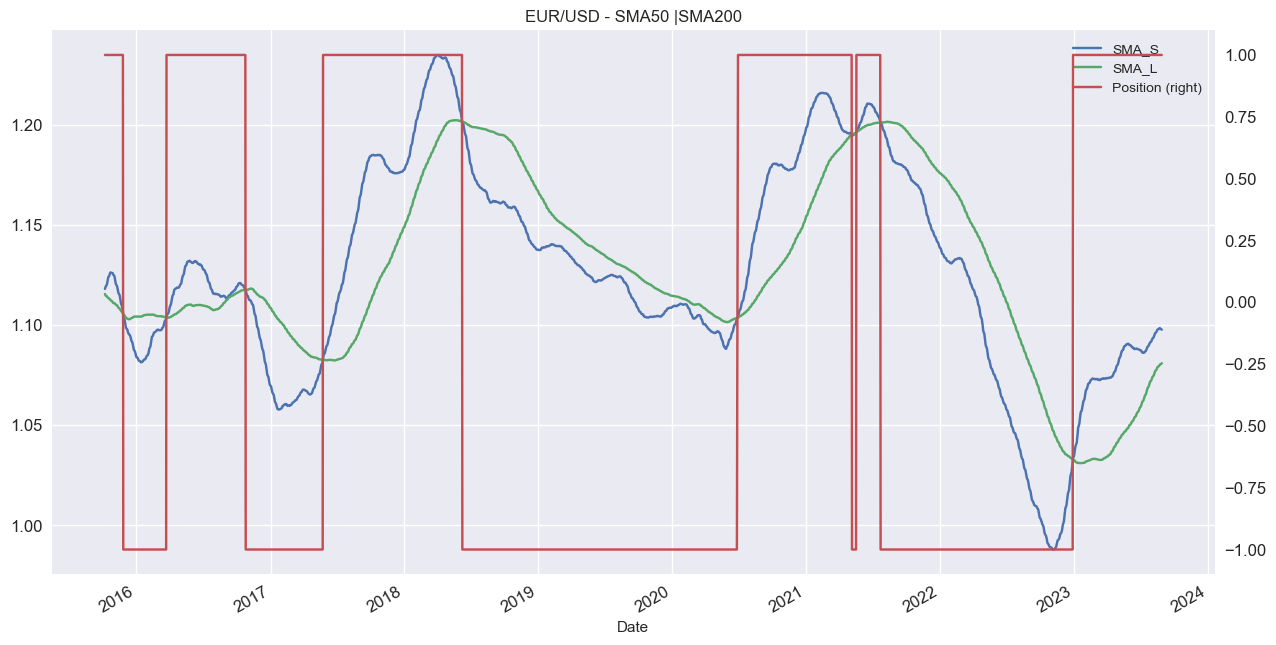

In [35]:
Data.loc[:,["SMA_S","SMA_L","Position"]].plot(figsize=(15,8), fontsize=12, secondary_y="Position", title = "EUR/USD - SMA{} |SMA{}".format(SMA_S,SMA_L))
plt.show()

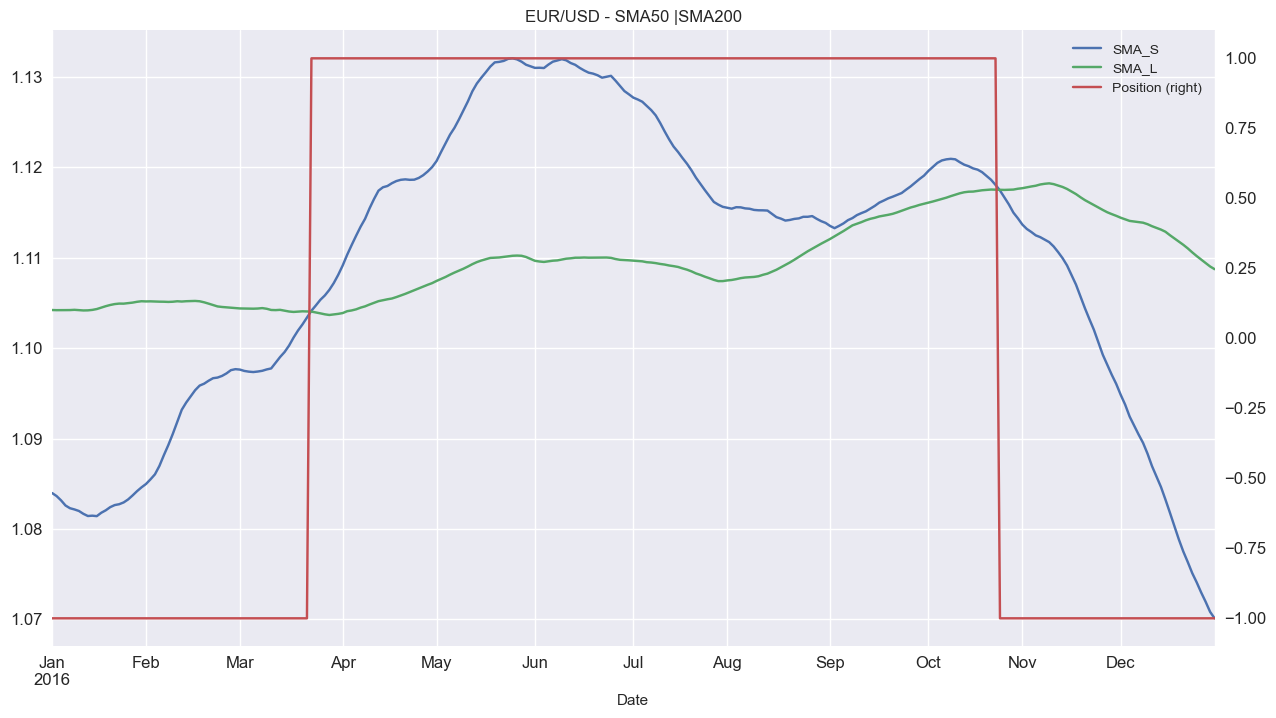

In [36]:
Data.loc["2016",["SMA_S","SMA_L","Position"]].plot(figsize=(15,8), fontsize=12, secondary_y="Position", title = "EUR/USD - SMA{} |SMA{}".format(SMA_S,SMA_L))
plt.show()

In [42]:
Data["Returns"]= np.log(Data.Price/Data.Price.shift())
Data["Strategy"]= Data.Position.shift()*Data.Returns


In [51]:
Data

,Price,SMA_S,SMA_L,Position,Returns,Strategy
Date,,,,,,
2015-10-07,1.126799,1.118026,1.115511,1,NaN,NaN
2015-10-08,1.124000,1.118538,1.115082,1,-0.002487,-0.002487
2015-10-09,1.128694,1.119233,1.114681,1,0.004167,0.004167
2015-10-12,1.136997,1.120035,1.114392,1,0.007330,0.007330
2015-10-13,1.135551,1.120834,1.114101,1,-0.001273,-0.001273
...,...,...,...,...,...,...
2023-08-23,1.084669,1.098414,1.079975,1,-0.004751,-0.004751
2023-08-24,1.086579,1.098459,1.080211,1,0.001759,0.001759
2023-08-25,1.079914,1.098166,1.080429,1,-0.006153,-0.006153


In [53]:
c

,0
Returns,-0.040056
Strategy,0.068061


In [54]:
Data[["Returns","Strategy"]].sum().apply(np.exp)

Returns     0.960736
Strategy    1.070431
dtype: float64

In [55]:
Data[["Returns","Strategy"]].mean()*252

Returns    -0.004910
Strategy    0.008342
dtype: float64

In [56]:
Data[["Returns","Strategy"]].std()*np.sqrt(252)

Returns     0.075357
Strategy    0.075356
dtype: float64

In [65]:
Data["Creturns"]= Data["Returns"].cumsum().apply(np.exp)
Data["Cstategy"]= Data["Strategy"].cumsum().apply(np.exp)

In [66]:
Data.dropna(inplace=True)
Data

,Price,SMA_S,SMA_L,Position,Returns,Strategy,Creturns,Cstategy,Cstrategy
Date,,,,,,,,,
2015-10-08,1.124000,1.118538,1.115082,1,-0.002487,-0.002487,0.997516,0.997516,0.997516
2015-10-09,1.128694,1.119233,1.114681,1,0.004167,0.004167,1.001682,1.001682,1.001682
2015-10-12,1.136997,1.120035,1.114392,1,0.007330,0.007330,1.009051,1.009051,1.009051
2015-10-13,1.135551,1.120834,1.114101,1,-0.001273,-0.001273,1.007767,1.007767,1.007767
2015-10-14,1.138498,1.121826,1.113855,1,0.002592,0.002592,1.010383,1.010383,1.010383
...,...,...,...,...,...,...,...,...,...
2023-08-23,1.084669,1.098414,1.079975,1,-0.004751,-0.004751,0.962611,1.072521,1.072521
2023-08-24,1.086579,1.098459,1.080211,1,0.001759,0.001759,0.964306,1.074409,1.074409
2023-08-25,1.079914,1.098166,1.080429,1,-0.006153,-0.006153,0.958391,1.067818,1.067818


In [77]:
Data=Data.drop(["Cstategy"], axis=1)

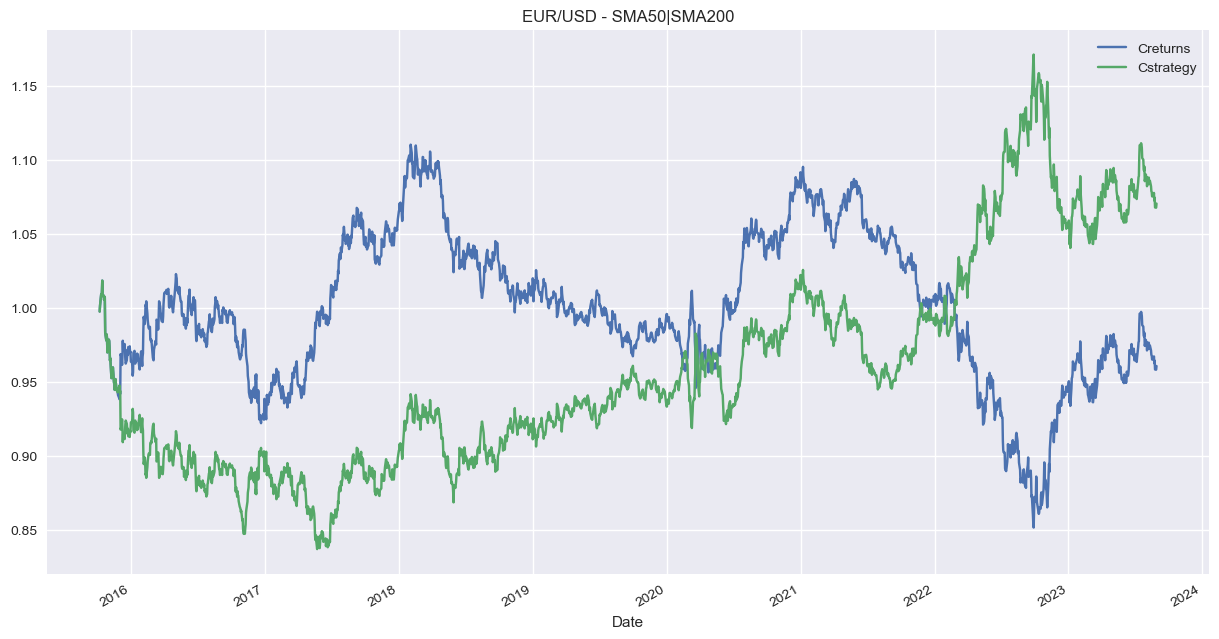

In [78]:
Data[["Creturns","Cstrategy"]].plot(figsize=(15,8), title = "EUR/USD - SMA{}|SMA{}".format(SMA_S,SMA_L))
plt.show()

In [79]:
Data.loc["2017"]

,Price,SMA_S,SMA_L,Position,Returns,Strategy,Creturns,Cstrategy
Date,,,,,,,,
2017-01-02,1.052698,1.069414,1.108430,-1,-0.004579,0.004579,0.934238,0.893687
2017-01-03,1.046003,1.068583,1.108059,-1,-0.006380,0.006380,0.928296,0.899407
2017-01-04,1.041992,1.067648,1.107623,-1,-0.003842,0.003842,0.924737,0.902869
2017-01-05,1.050089,1.066826,1.107206,-1,0.007741,-0.007741,0.931923,0.895908
2017-01-06,1.060592,1.066237,1.106819,-1,0.009952,-0.009952,0.941243,0.887036
...,...,...,...,...,...,...,...,...
2017-12-25,1.185607,1.176459,1.146101,1,-0.000107,-0.000107,1.052190,0.892484
2017-12-26,1.187254,1.176576,1.146650,1,0.001388,0.001388,1.053652,0.893724
2017-12-27,1.185789,1.176702,1.147207,1,-0.001234,-0.001234,1.052353,0.892622


In [80]:
outperf = Data.Cstrategy.iloc[-1]-Data.Creturns.iloc[-1]
outperf

0.10969497625424429

Back testing SMA Strategy

In [211]:
data = yf.download("EURUSD=X","2015-01-01","2023-08-30").Close.to_frame()
data.rename(columns= {"Close" : "price"}, inplace = True)
data

[*********************100%%**********************]  1 of 1 completed


,price
Date,
2015-01-01,1.209863
2015-01-02,1.208941
2015-01-05,1.194643
2015-01-06,1.193902
2015-01-07,1.187536
...,...
2023-08-23,1.084669
2023-08-24,1.086579
2023-08-25,1.079914


In [220]:
def test_strategy(SMA):
    
    df=data.copy()
    df["returns"]=np.log(df.price/df.price.shift())
    df["sma_s"]=df.price.rolling(int(SMA[0])).mean()
    df["sma_l"]=df.price.rolling(int(SMA[1])).mean()
    df.dropna(inplace= True)
    
    df["position"]=np.where(df["sma_s"]>df["sma_l"],1,-1)
    df["strategy"]=df.position.shift()*df["returns"]
    df.dropna(inplace=True)
    
    return np.exp(df["strategy"].sum())

In [221]:
data

,price
Date,
2015-01-01,1.209863
2015-01-02,1.208941
2015-01-05,1.194643
2015-01-06,1.193902
2015-01-07,1.187536
...,...
2023-08-23,1.084669
2023-08-24,1.086579
2023-08-25,1.079914


In [222]:
test_strategy((50,200))

1.0704306596962794

In [223]:
test_strategy((150,200))

0.9947602138172856

In [224]:
sma_s_range= range(10,50,1)
sma_l_range= range(100,252,1)

In [225]:
from itertools import product

In [226]:
combinations=list(product(sma_s_range,sma_l_range))

In [227]:
len(combinations)

6080

In [228]:
results= []
for comb in combinations:
    results.append(test_strategy(comb))

In [229]:
np.max(results)

1.2744993304142056

In [230]:
np.argmax(results)

4706

In [232]:
results

[0.9007875735619967,
 0.8970053409209511,
 0.8863847742954702,
 0.9074675826283587,
 0.922024917252989,
 0.9352695675281856,
 0.9630293487339238,
 0.9518029155907852,
 0.9785634972311944,
 0.9870986214799329,
 0.991590459614753,
 0.9664898627466754,
 0.9799866740241444,
 0.9583342776966168,
 0.9350461707365738,
 1.0008403506066454,
 0.9890935895296805,
 0.9670325430311263,
 1.0193207801484248,
 1.0109638819238662,
 1.0236091700368262,
 0.98895837547349,
 1.0125057466067118,
 1.0248755315582814,
 1.012192654182102,
 1.0453232625719624,
 1.0463061641466205,
 1.0450607363544637,
 1.0608271453004265,
 0.9925926994577136,
 1.0339120071045385,
 1.036057469439511,
 1.0310733674036792,
 1.030387053141838,
 1.041607456261991,
 1.0392587654666774,
 1.0400402618523694,
 1.0384219920280255,
 1.0342060652147487,
 1.0245037183588193,
 1.0197076381410175,
 1.027207822868239,
 1.0257918415363665,
 1.0191787608148868,
 1.0123432599536244,
 1.012934959107515,
 1.0094664377643674,
 1.044953514335941,
 1.

In [233]:
combinations[np.argmax(results)]

(40, 246)

In [234]:
many_results = pd.DataFrame(data=combinations, columns=["sma_s","sma_l"])
many_results

,sma_s,sma_l
0,10,100
1,10,101
2,10,102
3,10,103
4,10,104
...,...,...
6075,49,247
6076,49,248
6077,49,249
6078,49,250


In [235]:
many_results["performance"]=results

In [236]:
many_results.nlargest(10,"performance")

,sma_s,sma_l,performance
4706,40,246,1.274499
5310,44,242,1.264560
4558,39,250,1.262490
4862,41,250,1.262082
2707,27,223,1.261273
5311,44,243,1.260858
5756,47,232,1.260569
4705,40,245,1.260157
5162,43,246,1.259814
4557,39,249,1.259797


In [237]:
many_results.nsmallest(10,"performance")

,sma_s,sma_l,performance
306,12,102,0.867310
4872,42,108,0.882892
305,12,101,0.884800
2,10,102,0.886385
308,12,104,0.895865
1,10,101,0.897005
310,12,106,0.897630
0,10,100,0.900788
2742,28,106,0.901608
304,12,100,0.903157
